In [1]:
poke_df <- read.csv("C:/Users/kgtrm/Documents/VSC Code/R stuff/Pokemon Project/PokemonDataCleaned.csv")
str(poke_df)

'data.frame':	1076 obs. of  50 variables:
 $ X                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ï..Pokemon.Id                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Pokedex.Number                   : int  1 2 3 3 4 5 6 6 6 7 ...
 $ Pokemon.Name                     : chr  "Bulbasaur" "Ivysaur" "Venusaur" "Venusaur" ...
 $ Classification                   : chr  "Seed Pokemon" "Seed Pokemon" "Seed Pokemon" "Seed Pokemon" ...
 $ Alternate.Form.Name              : chr  "NULL" "NULL" "NULL" "Mega" ...
 $ Original.Pokemon.ID              : chr  "NULL" "NULL" "NULL" "3" ...
 $ Legendary.Type                   : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ Pokemon.Height                   : num  0.7 1 2 2.4 0.6 1.1 1.7 1.7 1.7 0.5 ...
 $ Pokemon.Weight                   : num  6.9 13 100 155.5 8.5 ...
 $ Primary.Type                     : chr  "Grass" "Grass" "Grass" "Grass" ...
 $ Secondary.Type                   : chr  "Poison" "Poison" "Poison" "Poison" ...
 $ Primary.Ability    

In [2]:
library(ggplot2)
library(tidyr)
library(dplyr)
options(repr.plot.width=15, repr.plot.height=8)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
# let's look at the top 10% of pokemon by BST
quantile(poke_df$Base.Stat.Total, 0.9)

90% 
600

In [7]:
# so the top 10% have BSTs >= 600. this has been the definition of a pseudo-legendary in the past
top_poke <- poke_df %>%
    filter(Base.Stat.Total >= 600)

top_poke

X,ï..Pokemon.Id,Pokedex.Number,Pokemon.Name,Classification,Alternate.Form.Name,Original.Pokemon.ID,Legendary.Type,Pokemon.Height,Pokemon.Weight,...,Experience.Growth,Experience.Growth.Total,Experience.Yield,Primary.Egg.Group,Secondary.Egg.Group,Egg.Cycle.Count,Pre.Evolution.Pokemon.Id,Evolution.Details,Fully.Evolved,Generation
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<int>
4,4,3,Venusaur,Seed Pokemon,Mega,3,NULL,2.4,155.5,...,Medium Slow,1059860,281,Monster,Grass,20,NULL,NULL,TRUE,6
8,8,6,Charizard,Flame Pokemon,Mega X,7,NULL,1.7,110.5,...,Medium Slow,1059860,285,Monster,Dragon,20,NULL,NULL,TRUE,6
9,9,6,Charizard,Flame Pokemon,Mega Y,7,NULL,1.7,100.5,...,Medium Slow,1059860,285,Monster,Dragon,20,NULL,NULL,TRUE,6
13,13,9,Blastoise,Shellfish Pokemon,Mega,12,NULL,1.6,101.1,...,Medium Slow,1059860,284,Monster,Water 1,20,NULL,NULL,TRUE,6
37,37,490,Manaphy,Seafaring Pokemon,NULL,NULL,"""Mythical""",0.3,1.4,...,Slow,1250000,270,Water 1,Fairy,10,NULL,NULL,TRUE,4
42,42,151,Mew,New Species Pokemon,NULL,NULL,"""Mythical""",0.4,4.0,...,Medium Slow,1059860,270,Undiscovered,NULL,120,NULL,NULL,TRUE,1
43,43,150,Mewtwo,Genetic Pokemon,NULL,NULL,"""Legendary""",2.0,122.0,...,Slow,1250000,306,Undiscovered,NULL,120,NULL,NULL,TRUE,1
44,44,150,Mewtwo,Genetic Pokemon,Mega X,43,"""Legendary""",2.3,127.0,...,Slow,1250000,351,Undiscovered,NULL,120,NULL,NULL,TRUE,6
45,45,150,Mewtwo,Genetic Pokemon,Mega Y,43,"""Legendary""",1.5,33.0,...,Slow,1250000,351,Undiscovered,NULL,120,NULL,NULL,TRUE,6


In [9]:
types_summary <- top_poke %>%
    filter(Primary.Type == "Grass" | Secondary.Type == "Grass") %>%
    summarize(Mean.Health = mean(Health.Stat), Median.Health = median(Health.Stat), MinHealth = min(Health.Stat), MaxHealth = max(Health.Stat), IQRHealth = IQR(Health.Stat),
                 Mean.Attack = mean(Attack.Stat), Median.Attack = median(Attack.Stat), MinAttack = min(Attack.Stat), MaxAttack = max(Attack.Stat), IQRAttack = IQR(Attack.Stat),
                 Mean.Defense = mean(Defense.Stat), Median.Defense = median(Defense.Stat), MinDefense = min(Defense.Stat), MaxDefense = max(Defense.Stat), IQRDefense = IQR(Special.Defense.Stat),
                 Mean.Special.Attack = mean(Special.Attack.Stat), Median.Special.Attack = median(Special.Attack.Stat), MinSpecial.Attack = min(Special.Attack.Stat), MaxSpecial.Attack = max(Special.Attack.Stat), IQRSpecial.Attack = IQR(Attack.Stat),
                 Mean.Special.Defense = mean(Special.Defense.Stat), Median.Special.Defense = median(Special.Defense.Stat), MinSpecial.Defense = min(Special.Defense.Stat), MaxSpecial.Defense = max(Special.Defense.Stat), IQRSpecial.Defense = IQR(Special.Defense.Stat),
                 Mean.Speed = mean(Speed.Stat), Median.Speed = median(Speed.Stat), MinSpeed = min(Speed.Stat), MaxSpeed = max(Speed.Stat), IQRSpeed = IQR(Speed.Stat),
                 Mean.Base.Stat.Total = mean(Base.Stat.Total), Median.Base.Stat.Total = median(Base.Stat.Total), MinBase.Stat.Total = min(Base.Stat.Total), MaxBase.Stat.Total = max(Base.Stat.Total), IQRBase.Stat.Total = IQR(Base.Stat.Total),
                 Mean.Experience.Yield = mean(Experience.Yield), Median.Experience.Yield = median(Experience.Yield), MinExperience.Yield = min(Experience.Yield), MaxExperience.Yield = max(Experience.Yield), IQRExperience.Yield = IQR(Experience.Yield),
                 Count = n()) %>%
    mutate(Type = "Grass")

# this needs to be done for each other type
types_list = c('Fire','Water','Electric','Poison','Bug','Steel','Normal','Fighting','Psychic','Fairy',
               'Ice','Ground','Dark','Rock','Dragon','Ghost','Flying')
for (type in types_list) {
    temp_row <- top_poke %>%
    filter(Primary.Type == type | Secondary.Type == type) %>%
    summarize(Mean.Health = mean(Health.Stat), Median.Health = median(Health.Stat), MinHealth = min(Health.Stat), MaxHealth = max(Health.Stat), IQRHealth = IQR(Health.Stat),
                 Mean.Attack = mean(Attack.Stat), Median.Attack = median(Attack.Stat), MinAttack = min(Attack.Stat), MaxAttack = max(Attack.Stat), IQRAttack = IQR(Attack.Stat),
                 Mean.Defense = mean(Defense.Stat), Median.Defense = median(Defense.Stat), MinDefense = min(Defense.Stat), MaxDefense = max(Defense.Stat), IQRDefense = IQR(Special.Defense.Stat),
                 Mean.Special.Attack = mean(Special.Attack.Stat), Median.Special.Attack = median(Special.Attack.Stat), MinSpecial.Attack = min(Special.Attack.Stat), MaxSpecial.Attack = max(Special.Attack.Stat), IQRSpecial.Attack = IQR(Attack.Stat),
                 Mean.Special.Defense = mean(Special.Defense.Stat), Median.Special.Defense = median(Special.Defense.Stat), MinSpecial.Defense = min(Special.Defense.Stat), MaxSpecial.Defense = max(Special.Defense.Stat), IQRSpecial.Defense = IQR(Special.Defense.Stat),
                 Mean.Speed = mean(Speed.Stat), Median.Speed = median(Speed.Stat), MinSpeed = min(Speed.Stat), MaxSpeed = max(Speed.Stat), IQRSpeed = IQR(Speed.Stat),
                 Mean.Base.Stat.Total = mean(Base.Stat.Total), Median.Base.Stat.Total = median(Base.Stat.Total), MinBase.Stat.Total = min(Base.Stat.Total), MaxBase.Stat.Total = max(Base.Stat.Total), IQRBase.Stat.Total = IQR(Base.Stat.Total),
                 Mean.Experience.Yield = mean(Experience.Yield), Median.Experience.Yield = median(Experience.Yield), MinExperience.Yield = min(Experience.Yield), MaxExperience.Yield = max(Experience.Yield), IQRExperience.Yield = IQR(Experience.Yield),
                 Count = n()) %>%
    mutate(Type = type)
    
    types_summary[nrow(types_summary) + 1,] <- temp_row
}

types_summary

,Mean.Health,Median.Health,MinHealth,MaxHealth,IQRHealth,Mean.Attack,Median.Attack,MinAttack,MaxAttack,IQRAttack,...,MinBase.Stat.Total,MaxBase.Stat.Total,IQRBase.Stat.Total,Mean.Experience.Yield,Median.Experience.Yield,MinExperience.Yield,MaxExperience.Yield,IQRExperience.Yield,Count,Type
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,...,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>
1,92.50000,100.0,70,105,15.00,105.5000,101.5,100,120,8.25,...,600,630,18.75,274.8333,272.0,270,284,9.25,6,Grass
2,88.80000,85.5,75,106,21.50,121.4000,115.0,90,180,29.00,...,600,770,68.50,283.3000,284.5,210,347,30.75,10,Fire
3,86.10000,92.5,45,100,20.75,127.3000,130.0,100,155,44.00,...,600,770,40.00,279.4000,285.0,217,347,28.50,10,Water
4,92.66667,90.0,88,100,6.00,119.0000,112.0,95,150,27.50,...,600,680,40.00,283.6667,275.0,270,306,18.00,3,Electric
5,133.75000,110.0,60,255,93.75,91.2500,92.5,65,115,23.75,...,600,1125,180.00,364.7500,313.0,270,563,121.25,4,Poison
6,71.50000,70.5,65,80,4.50,152.5000,152.5,120,185,20.00,...,600,600,0.00,225.0000,210.0,210,270,15.00,4,Bug
7,92.64706,91.0,70,137,25.00,132.0588,137.0,90,170,25.00,...,600,720,80.00,280.5882,270.0,210,360,36.00,17,Steel
8,116.00000,110.0,100,150,20.00,129.0000,128.0,77,160,40.00,...,600,720,70.00,283.6000,270.0,252,324,32.00,5,Normal
9,83.00000,80.0,68,100,17.00,142.0000,130.0,110,185,32.00,...,600,720,30.00,277.3333,270.0,210,360,14.00,9,Fighting


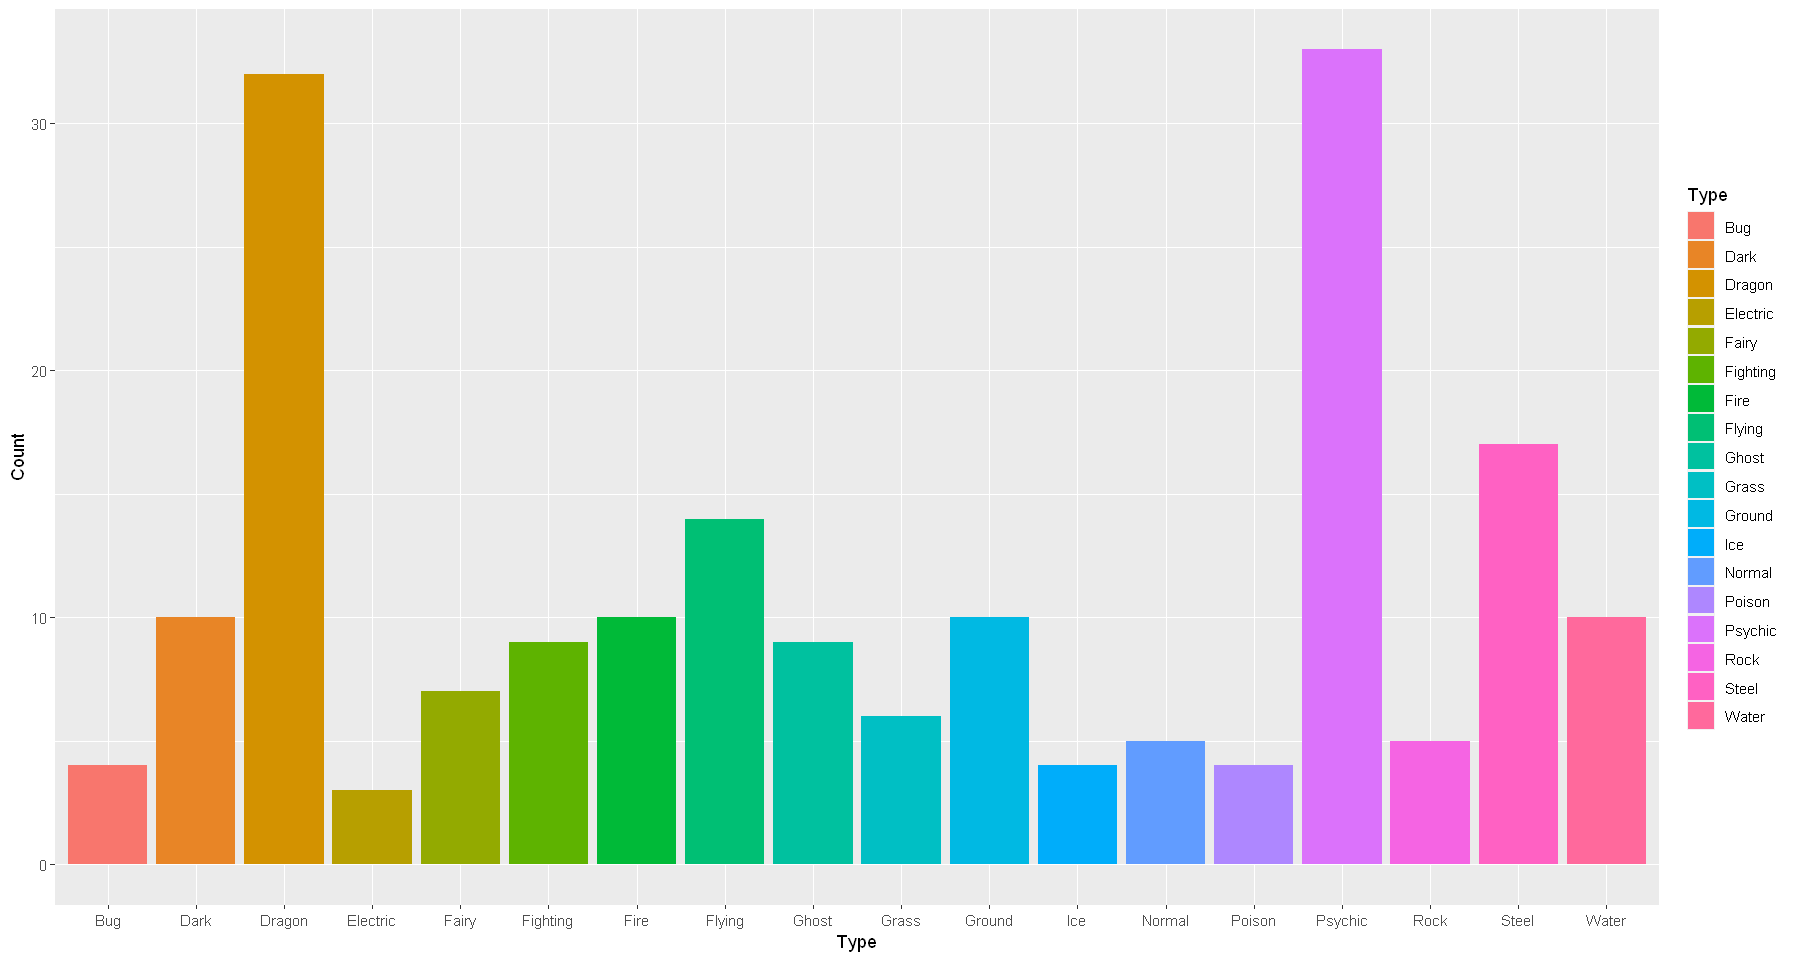

In [18]:
ggplot(aes(x = Type, y = Count), data = types_summary) +
    geom_bar(stat = "identity", aes(fill = Type))

In [19]:
top_leg <- top_poke %>%
    filter(Legendary.Type != "NULL")

top_leg

X,ï..Pokemon.Id,Pokedex.Number,Pokemon.Name,Classification,Alternate.Form.Name,Original.Pokemon.ID,Legendary.Type,Pokemon.Height,Pokemon.Weight,...,Experience.Growth,Experience.Growth.Total,Experience.Yield,Primary.Egg.Group,Secondary.Egg.Group,Egg.Cycle.Count,Pre.Evolution.Pokemon.Id,Evolution.Details,Fully.Evolved,Generation
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<int>
37,37,490,Manaphy,Seafaring Pokemon,NULL,NULL,"""Mythical""",0.3,1.4,...,Slow,1250000,270,Water 1,Fairy,10,NULL,NULL,TRUE,4
42,42,151,Mew,New Species Pokemon,NULL,NULL,"""Mythical""",0.4,4.0,...,Medium Slow,1059860,270,Undiscovered,NULL,120,NULL,NULL,TRUE,1
43,43,150,Mewtwo,Genetic Pokemon,NULL,NULL,"""Legendary""",2.0,122.0,...,Slow,1250000,306,Undiscovered,NULL,120,NULL,NULL,TRUE,1
44,44,150,Mewtwo,Genetic Pokemon,Mega X,43,"""Legendary""",2.3,127.0,...,Slow,1250000,351,Undiscovered,NULL,120,NULL,NULL,TRUE,6
45,45,150,Mewtwo,Genetic Pokemon,Mega Y,43,"""Legendary""",1.5,33.0,...,Slow,1250000,351,Undiscovered,NULL,120,NULL,NULL,TRUE,6
243,373,249,Lugia,Diving Pokemon,NULL,NULL,"""Legendary""",5.2,216.0,...,Slow,1250000,306,Undiscovered,NULL,120,NULL,NULL,TRUE,2
244,374,250,Ho-Oh,Rainbow Pokemon,NULL,NULL,"""Legendary""",3.8,199.0,...,Slow,1250000,306,Undiscovered,NULL,120,NULL,NULL,TRUE,2
245,375,251,Celebi,Time Travel Pokemon,NULL,NULL,"""Mythical""",0.6,5.0,...,Medium Slow,1059860,270,Undiscovered,NULL,120,NULL,NULL,TRUE,2
374,508,380,Latias,Eon Pokemon,NULL,NULL,"""Sub-Legendary""",1.4,40.0,...,Slow,1250000,270,Undiscovered,NULL,120,NULL,NULL,TRUE,3


In [20]:
top_nonleg <- top_poke %>%
    filter(Legendary.Type == "NULL")

top_nonleg

X,ï..Pokemon.Id,Pokedex.Number,Pokemon.Name,Classification,Alternate.Form.Name,Original.Pokemon.ID,Legendary.Type,Pokemon.Height,Pokemon.Weight,...,Experience.Growth,Experience.Growth.Total,Experience.Yield,Primary.Egg.Group,Secondary.Egg.Group,Egg.Cycle.Count,Pre.Evolution.Pokemon.Id,Evolution.Details,Fully.Evolved,Generation
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<int>
4,4,3,Venusaur,Seed Pokemon,Mega,3,NULL,2.4,155.5,...,Medium Slow,1059860,281,Monster,Grass,20,NULL,NULL,TRUE,6
8,8,6,Charizard,Flame Pokemon,Mega X,7,NULL,1.7,110.5,...,Medium Slow,1059860,285,Monster,Dragon,20,NULL,NULL,TRUE,6
9,9,6,Charizard,Flame Pokemon,Mega Y,7,NULL,1.7,100.5,...,Medium Slow,1059860,285,Monster,Dragon,20,NULL,NULL,TRUE,6
13,13,9,Blastoise,Shellfish Pokemon,Mega,12,NULL,1.6,101.1,...,Medium Slow,1059860,284,Monster,Water 1,20,NULL,NULL,TRUE,6
150,244,149,Dragonite,Dragon Pokemon,NULL,NULL,NULL,2.2,210.0,...,Slow,1250000,270,Water 1,Dragon,40,243,Level 55,TRUE,1
242,372,248,Tyranitar,Armor Pokemon,NULL,NULL,NULL,2.0,202.0,...,Slow,1250000,270,Monster,NULL,40,371,Level 55,TRUE,2
283,417,289,Slaking,Lazy Pokemon,NULL,NULL,NULL,2.0,130.5,...,Slow,1250000,252,Field,NULL,15,416,Level 36,TRUE,3
367,501,373,Salamence,Dragon Pokemon,NULL,NULL,NULL,1.5,102.6,...,Slow,1250000,270,Dragon,NULL,40,500,Level 50,TRUE,3
370,504,376,Metagross,Iron Leg Pokemon,NULL,NULL,NULL,1.6,550.0,...,Slow,1250000,270,Mineral,NULL,40,503,Level 45,TRUE,3


In [24]:
top_nonleg_nomega <- top_nonleg %>%
    filter(Alternate.Form.Name != "Mega") %>%
    filter(Alternate.Form.Name != "Mega X") %>%
    filter(Alternate.Form.Name != "Mega Y")

top_nonleg_nomega

X,ï..Pokemon.Id,Pokedex.Number,Pokemon.Name,Classification,Alternate.Form.Name,Original.Pokemon.ID,Legendary.Type,Pokemon.Height,Pokemon.Weight,...,Experience.Growth,Experience.Growth.Total,Experience.Yield,Primary.Egg.Group,Secondary.Egg.Group,Egg.Cycle.Count,Pre.Evolution.Pokemon.Id,Evolution.Details,Fully.Evolved,Generation
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<int>
150,244,149,Dragonite,Dragon Pokemon,NULL,NULL,NULL,2.2,210.0,...,Slow,1250000,270,Water 1,Dragon,40,243,Level 55,TRUE,1
242,372,248,Tyranitar,Armor Pokemon,NULL,NULL,NULL,2.0,202.0,...,Slow,1250000,270,Monster,NULL,40,371,Level 55,TRUE,2
283,417,289,Slaking,Lazy Pokemon,NULL,NULL,NULL,2.0,130.5,...,Slow,1250000,252,Field,NULL,15,416,Level 36,TRUE,3
367,501,373,Salamence,Dragon Pokemon,NULL,NULL,NULL,1.5,102.6,...,Slow,1250000,270,Dragon,NULL,40,500,Level 50,TRUE,3
370,504,376,Metagross,Iron Leg Pokemon,NULL,NULL,NULL,1.6,550.0,...,Slow,1250000,270,Mineral,NULL,40,503,Level 45,TRUE,3
433,643,445,Garchomp,Mach Pokemon,NULL,NULL,NULL,1.9,95.0,...,Slow,1250000,270,Monster,Dragon,40,642,Level 48,TRUE,4
631,1010,635,Hydreigon,Brutal Pokemon,NULL,NULL,NULL,1.8,160.0,...,Slow,1250000,270,Dragon,NULL,40,1009,Level 64,TRUE,5
707,1135,706,Goodra,Dragon Pokemon,NULL,NULL,NULL,2.0,150.5,...,Slow,1250000,270,Dragon,NULL,40,1134,Level 50 When Raining Or Foggy Outside Battle,TRUE,6
792,1313,784,Kommo-o,Scaly Pokemon,NULL,NULL,NULL,1.6,78.2,...,Slow,1250000,270,Dragon,NULL,40,1312,Level 45,TRUE,7
